In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
df.shape

(2225, 2)

In [ ]:
# import dan download package
import nltk, os, re, string

from keras.layers import Input, LSTM, Dropout, Flatten, Dense, Embedding
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download('wordnet')
nltk.download('stopwords') 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#mengubah huruf kapital menjadi huruf kecil
df['text'] = df['text'].str.lower()
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
#hapus angka
def hapus_angka(tweet):
    tweet = re.sub(r"\d+", "", tweet)
    return tweet

In [ ]:
df['text'] = df['text'].apply(lambda x: hapus_angka(x))
df.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [ ]:
#menghapus tanda baca
def cleaner(data):
    return(data.translate(str.maketrans('','', string.punctuation)))

In [ ]:
df['text'] = df['text'].apply(lambda x: cleaner(x))
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
#mengubah kata menjadi kata dasar
lemmatizer = WordNetLemmatizer()

def lem(data):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())]))
    df.text = df.text.apply(lambda x: lem(x))

In [ ]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
#menghapus beberapa kata yang tidak penting
from nltk.corpus import stopwords
st_words = stopwords.words()
def stopword(data):
    return(' '.join([w for w in data.split() if w not in st_words ]))

df['text'] = df['text'].apply(lambda x: stopword(x))
df.head(10)

,category,text
0,tech,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books former worldcom boss ...
2,sport,tigers wary farrell gamble leicester rushed ma...
3,sport,yeading newcastle cup premiership side newcast...
4,entertainment,ocean twelve raids box office ocean twelve cri...
5,politics,howard hits back mongrel jibe michael howard c...
6,politics,blair prepares poll date tony blair election d...
7,sport,henman hopes ended dubai seed tim henman slump...
8,sport,wilkinson fit edinburgh england captain jonny ...
9,entertainment,star wars children sixth final star wars movie...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer().fit(df['text'])

bow_transformer.vocabulary_

{'tv': 27373,
 'future': 10535,
 'hands': 11637,
 'viewers': 28341,
 'home': 12320,
 'theatre': 26483,
 'systems': 26023,
 'plasma': 19718,
 'highdefinition': 12100,
 'tvs': 27380,
 'digital': 7148,
 'video': 28322,
 'recorders': 21416,
 'moving': 17187,
 'living': 15325,
 'room': 22572,
 'watch': 28693,
 'radically': 21018,
 'different': 7133,
 'years': 29462,
 'time': 26711,
 'expert': 9101,
 'panel': 18923,
 'gathered': 10690,
 'annual': 1076,
 'consumer': 5526,
 'electronics': 8269,
 'show': 23936,
 'vegas': 28197,
 'discuss': 7321,
 'technologies': 26267,
 'impact': 12854,
 'favourite': 9462,
 'pastimes': 19096,
 'leading': 14874,
 'trend': 27149,
 'programmes': 20522,
 'content': 5560,
 'delivered': 6748,
 'networks': 17644,
 'cable': 3687,
 'satellite': 22974,
 'telecoms': 26303,
 'companies': 5146,
 'broadband': 3334,
 'service': 23584,
 'providers': 20678,
 'front': 10402,
 'rooms': 22573,
 'portable': 19968,
 'devices': 7050,
 'talkedabout': 26094,
 'personal': 19396,
 'dvr':

In [ ]:
text_bow = bow_transformer.transform(df['text'])

print(text_bow)

  (0, 51)	1
  (0, 269)	1
  (0, 289)	1
  (0, 414)	2
  (0, 415)	1
  (0, 620)	1
  (0, 1065)	1
  (0, 1076)	1
  (0, 1792)	1
  (0, 2246)	3
  (0, 2595)	1
  (0, 2599)	1
  (0, 2615)	1
  (0, 2979)	1
  (0, 3116)	2
  (0, 3171)	3
  (0, 3172)	1
  (0, 3176)	3
  (0, 3334)	2
  (0, 3337)	1
  (0, 3339)	1
  (0, 3500)	1
  (0, 3501)	1
  (0, 3613)	1
  (0, 3643)	1
  :	:
  (2224, 18854)	1
  (2224, 19681)	1
  (2224, 19736)	1
  (2224, 19743)	1
  (2224, 19745)	1
  (2224, 20082)	1
  (2224, 20525)	1
  (2224, 21410)	2
  (2224, 22133)	1
  (2224, 22459)	1
  (2224, 23194)	1
  (2224, 23311)	1
  (2224, 23768)	2
  (2224, 24654)	4
  (2224, 25166)	1
  (2224, 25436)	1
  (2224, 25472)	1
  (2224, 27168)	1
  (2224, 27481)	2
  (2224, 27797)	1
  (2224, 28320)	1
  (2224, 28982)	1
  (2224, 29060)	1
  (2224, 29097)	1
  (2224, 29451)	2


In [ ]:
X = text_bow.toarray()

print(X)

X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(2225, 29622)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer().fit(text_bow)

print(tfidf_transformer)

tweet_tfidf=tfidf_transformer.transform(text_bow)

print(tweet_tfidf)

print(tweet_tfidf.shape)

TfidfTransformer()
  (0, 29511)	0.04017034780342983
  (0, 29462)	0.03585970406186696
  (0, 29279)	0.03929224839010194
  (0, 29243)	0.022244400520783438
  (0, 29067)	0.03880744537374141
  (0, 29062)	0.10154096663877665
  (0, 28776)	0.02836573134414108
  (0, 28693)	0.14415988318251885
  (0, 28341)	0.1150495267607209
  (0, 28340)	0.05148036130500486
  (0, 28322)	0.059584681765739465
  (0, 28292)	0.039127425608636586
  (0, 28197)	0.043857845924619214
  (0, 28014)	0.055167859426194246
  (0, 27512)	0.04227383375063526
  (0, 27491)	0.05983154304602579
  (0, 27382)	0.06538846371149903
  (0, 27380)	0.09789995553906425
  (0, 27373)	0.33187024030229456
  (0, 27149)	0.07555416861134419
  (0, 26807)	0.018613284449810467
  (0, 26789)	0.029239865532508506
  (0, 26776)	0.06538846371149903
  (0, 26774)	0.16223535062977204
  (0, 26711)	0.034133264317673405
  :	:
  (2224, 11051)	0.09372802209597528
  (2224, 11042)	0.11463181216211053
  (2224, 11041)	0.24681835718519363
  (2224, 10701)	0.078964802627872
 

In [ ]:
df.head()

,category,text
0,tech,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books former worldcom boss ...
2,sport,tigers wary farrell gamble leicester rushed ma...
3,sport,yeading newcastle cup premiership side newcast...
4,entertainment,ocean twelve raids box office ocean twelve cri...


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, df.category, test_size=0.2,
random_state=35)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(x_train,y_train)

In [ ]:
prediction = model.predict(x_test)

predict= pd.Series(prediction)

print(predict.to_string())

0               tech
1              sport
2               tech
3           business
4           politics
5               tech
6      entertainment
7           politics
8               tech
9           politics
10             sport
11          business
12          business
13              tech
14          business
15          business
16          business
17              tech
18          business
19          business
20              tech
21          politics
22              tech
23              tech
24             sport
25          business
26     entertainment
27              tech
28          politics
29              tech
30          politics
31          business
32             sport
33     entertainment
34              tech
35          business
36             sport
37     entertainment
38          politics
39          politics
40             sport
41              tech
42              tech
43     entertainment
44     entertainment
45             sport
46              tech
47     entert

In [ ]:
true_label= pd.Series(y_test)

print(true_label.to_string())

848              tech
899             sport
553              tech
2071         business
1155         politics
1647             tech
1306    entertainment
934          politics
580              tech
5            politics
2157            sport
750          business
755          business
576              tech
1158         business
836          business
2112         business
718              tech
449          business
1962         business
1419             tech
2056         politics
727              tech
1460             tech
2177            sport
2052         business
689     entertainment
239              tech
1735         politics
1781             tech
1908         politics
1801         business
2140            sport
2021    entertainment
2085             tech
785          business
1711            sport
856     entertainment
1481         politics
1617    entertainment
1489            sport
19               tech
1021             tech
1591    entertainment
131     entertainment
305       

In [ ]:
from time import time

from sklearn import metrics

import matplotlib.pyplot as plt

import seaborn as sn

from sklearn.metrics import confusion_matrix

from sklearn.metrics import plot_confusion_matrix

from pandas import DataFrame

t = time()

y_pred = model.predict(x_test)

test_time = time() - t

print("test time: %0.3fs" % test_time)

score1 = metrics.accuracy_score(y_test, y_pred)

print("accuracy: %0.3f" % score1)

test time: 0.053s
accuracy: 0.969


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

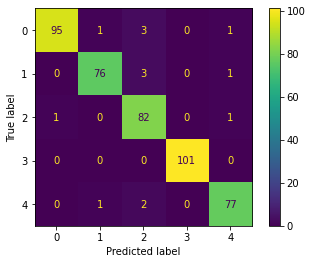

In [ ]:
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.99      0.95      0.97       100
entertainment       0.97      0.95      0.96        80
     politics       0.91      0.98      0.94        84
        sport       1.00      1.00      1.00       101
         tech       0.96      0.96      0.96        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train,y_train, cv=10)

# Print the accuracy of each fold:

print(scores)

# Print the mean accuracy of all 10 folds

print(scores.mean())

[0.98314607 0.96067416 0.97191011 0.98314607 0.98314607 0.98876404
 0.97752809 0.97752809 0.96067416 0.96629213]
0.9752808988764045


In [ ]:
y_test.shape

(445,)